In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

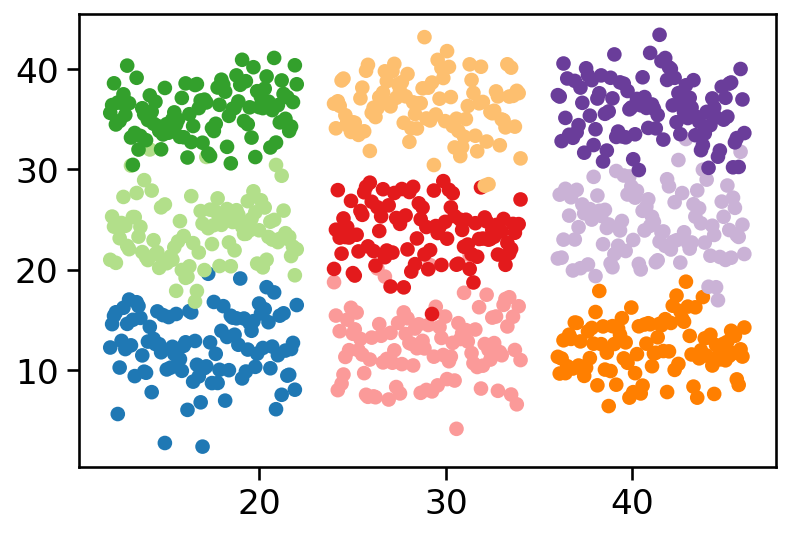

In [87]:
def make_clusters(wide, height, size, x0=0, y=0, mark=0):
    x=np.linspace(x0, x0+wide, size)
    y=np.random.normal(y, height, size=(size,))
    mark = np.ones(size, dtype='int32') * mark
    return pd.DataFrame({'x1': x, 'x2': y, 'mark': mark})
    


colors = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])
data = None
n = 1
d = 12
n_p = 100
for i in range(3):
    for j in range(3):
        if n == 0:
            data = make_clusters(10, 3, n_p, (i+1)*d, (j+1)*d, n)
        else:
            data = pd.concat( (data, make_clusters(10, 3, n_p, (i+1)*d, (j+1)*d, n) ), ignore_index=True)
        n+=1
# data = data.sample(frac=1).reset_index(drop=True)
fig, ax = plt.subplots(dpi=150)
ax.scatter(data.x1, data.x2, c=colors[data.mark])

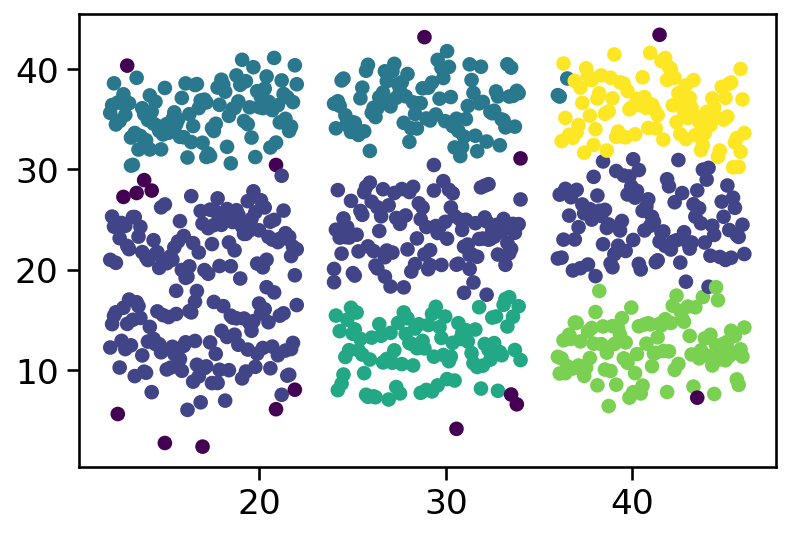

In [124]:
from sklearn.cluster import DBSCAN
km = DBSCAN(eps=3, min_samples=20)
clusters = km.fit_predict(data.drop(columns=['mark']))
fig, ax = plt.subplots(dpi=150)
ax.scatter(data.x1, data.x2, c=clusters)

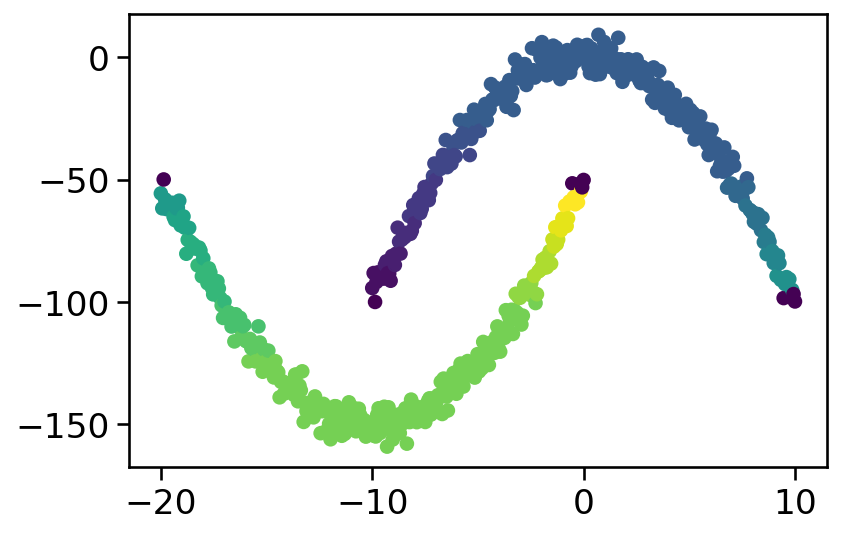

In [137]:
parab = lambda a, b, c, x: a*x**2 + b*x + c + np.random.normal(0, 4, size=x.shape)

x = np.linspace(-10, 10, 300)[:, np.newaxis]
x = np.hstack((x, parab(-1, 0, 0, x)))

x0 = x.copy()
x0[:, 1] *= -1
x0[:, 1] -= 150
x0[:, 0] -= 10
x = np.vstack((x, x0))
km = DBSCAN(eps=3, min_samples=5)
clus = km.fit_predict(x)
fig, ax = plt.subplots(dpi=150)
ax.scatter(x[:, 0], x[:, 1], c=clus)